<a href="https://colab.research.google.com/github/geniusnhu/DNN-Improvement/blob/master/Tuning_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tuning Optimizer

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import time

## Classification task

Using He Initialization and ReLU Activation function (86.72% Train set; 86.37% Test set;	99.76 seconds)

**Tune Optimizer**

In [0]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [20]:
# ReLU goes with he initialization, let's see of this improve the model performance nd running time
tf.random.set_seed(50)
np.random.seed(50)

model_default = keras.models.Sequential()
model_default.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_layers in (300, 100, 50, 50, 50):
  model_default.add(keras.layers.Dense(n_layers, activation ='relu', kernel_initializer="he_normal"))
model_default.add(keras.layers.Dense(10, activation='softmax'))
    
model_default.compile(loss="sparse_categorical_crossentropy",
                      optimizer=keras.optimizers.SGD(lr=1e-3),
                      metrics=["accuracy"])

start_time = time.time()
history = model_default.fit(X_train_full, y_train_full, epochs=20, validation_split=0.1)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
1688/1688 [==============================] - 7s 4ms/step - loss: 1.7039 - accuracy: 0.4326 - val_loss: 1.0764 - val_accuracy: 0.6665
Epoch 2/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.8365 - accuracy: 0.7089 - val_loss: 0.6898 - val_accuracy: 0.7625
Epoch 3/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.6503 - accuracy: 0.7769 - val_loss: 0.5991 - val_accuracy: 0.7937
Epoch 4/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5770 - accuracy: 0.8010 - val_loss: 0.5531 - val_accuracy: 0.8080
Epoch 5/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5362 - accuracy: 0.8133 - val_loss: 0.5147 - val_accuracy: 0.8193
Epoch 6/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5091 - accuracy: 0.8217 - val_loss: 0.4960 - val_accuracy: 0.8275
Epoch 7/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4896 - accuracy: 0.8287 - val_loss: 0.4846 - val_accuracy:

In [21]:
# ReLU goes with he initialization, SGD(lr=0.001, momentum=0.9) optimizer
tf.random.set_seed(50)
np.random.seed(50)

model_default = keras.models.Sequential()
model_default.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_layers in (300, 100, 50, 50, 50):
  model_default.add(keras.layers.Dense(n_layers, activation ='relu', kernel_initializer="he_normal"))
model_default.add(keras.layers.Dense(10, activation='softmax'))
    
model_default.compile(loss="sparse_categorical_crossentropy",
                      optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9),
                      metrics=["accuracy"])

start_time = time.time()
history = model_default.fit(X_train_full, y_train_full, epochs=20, validation_split=0.1)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.7497 - accuracy: 0.7426 - val_loss: 0.5159 - val_accuracy: 0.8183
Epoch 2/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4618 - accuracy: 0.8361 - val_loss: 0.4757 - val_accuracy: 0.8347
Epoch 3/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4103 - accuracy: 0.8528 - val_loss: 0.4024 - val_accuracy: 0.8523
Epoch 4/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3733 - accuracy: 0.8663 - val_loss: 0.3765 - val_accuracy: 0.8622
Epoch 5/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3529 - accuracy: 0.8704 - val_loss: 0.3699 - val_accuracy: 0.8638
Epoch 6/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3353 - accuracy: 0.8776 - val_loss: 0.3550 - val_accuracy: 0.8707
Epoch 7/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3195 - accuracy: 0.8818 - val_loss: 0.3452 - val_accuracy:

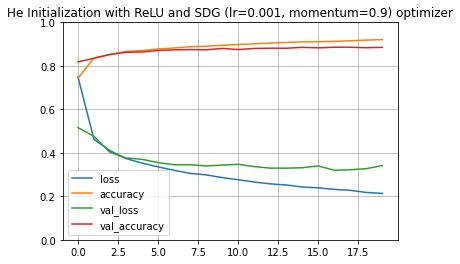

In [22]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('He Initialization with ReLU and SDG (lr=0.001, momentum=0.9) optimizer')
plt.show()

Epoch 1/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.7354 - accuracy: 0.7461 - val_loss: 0.5505 - val_accuracy: 0.8102
Epoch 2/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4525 - accuracy: 0.8413 - val_loss: 0.4290 - val_accuracy: 0.8498
Epoch 3/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4041 - accuracy: 0.8575 - val_loss: 0.4162 - val_accuracy: 0.8465
Epoch 4/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3702 - accuracy: 0.8680 - val_loss: 0.3692 - val_accuracy: 0.8647
Epoch 5/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3485 - accuracy: 0.8735 - val_loss: 0.3704 - val_accuracy: 0.8635
Epoch 6/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3307 - accuracy: 0.8787 - val_loss: 0.3493 - val_accuracy: 0.8710
Epoch 7/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3149 - accuracy: 0.8843 - val_loss: 0.3404 - val_accuracy:

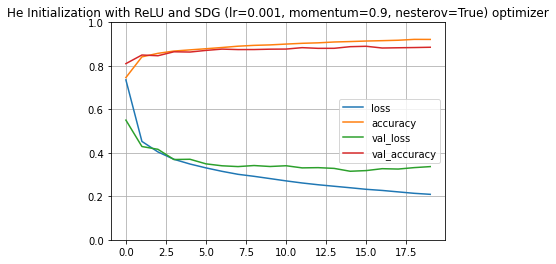

In [23]:
# ReLU goes with he initialization, SGD(lr=0.001, momentum=0.9) optimizer with nesterov is activated 
tf.random.set_seed(50)
np.random.seed(50)

model_default = keras.models.Sequential()
model_default.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_layers in (300, 100, 50, 50, 50):
  model_default.add(keras.layers.Dense(n_layers, activation ='relu', kernel_initializer="he_normal"))
model_default.add(keras.layers.Dense(10, activation='softmax'))
    
model_default.compile(loss="sparse_categorical_crossentropy",
                      optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9,nesterov=True),
                      metrics=["accuracy"])

start_time = time.time()
history = model_default.fit(X_train_full, y_train_full, epochs=20, validation_split=0.1)
print("--- %s seconds ---" % (time.time() - start_time))

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('He Initialization with ReLU and SDG (lr=0.001, momentum=0.9, nesterov=True) optimizer')
plt.show()

In [24]:
# ReLU goes with he initialization, AdaGrad optimizer
tf.random.set_seed(50)
np.random.seed(50)

model_default = keras.models.Sequential()
model_default.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_layers in (300, 100, 50, 50, 50):
  model_default.add(keras.layers.Dense(n_layers, activation ='relu', kernel_initializer="he_normal"))
model_default.add(keras.layers.Dense(10, activation='softmax'))
    
model_default.compile(loss="sparse_categorical_crossentropy",
                      optimizer=keras.optimizers.Adagrad(lr=0.001),
                      metrics=["accuracy"])

start_time = time.time()
history = model_default.fit(X_train_full, y_train_full, epochs=20, validation_split=0.1)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
1688/1688 [==============================] - 8s 5ms/step - loss: 1.1734 - accuracy: 0.6104 - val_loss: 0.7003 - val_accuracy: 0.7645
Epoch 2/20
1688/1688 [==============================] - 11s 7ms/step - loss: 0.6325 - accuracy: 0.7844 - val_loss: 0.5731 - val_accuracy: 0.8040
Epoch 3/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.5539 - accuracy: 0.8111 - val_loss: 0.5372 - val_accuracy: 0.8135
Epoch 4/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.5170 - accuracy: 0.8239 - val_loss: 0.5097 - val_accuracy: 0.8228
Epoch 5/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4942 - accuracy: 0.8290 - val_loss: 0.4891 - val_accuracy: 0.8287
Epoch 6/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4774 - accuracy: 0.8354 - val_loss: 0.4776 - val_accuracy: 0.8340
Epoch 7/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4641 - accuracy: 0.8394 - val_loss: 0.4680 - val_accuracy

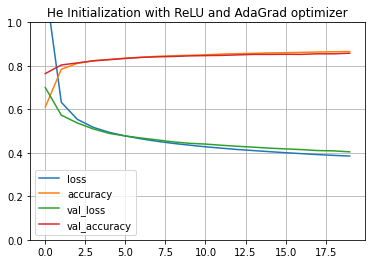

In [25]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('He Initialization with ReLU and AdaGrad optimizer')
plt.show()

Epoch 1/20
1688/1688 [==============================] - 12s 7ms/step - loss: 0.5554 - accuracy: 0.7972 - val_loss: 0.4930 - val_accuracy: 0.8330
Epoch 2/20
1688/1688 [==============================] - 11s 7ms/step - loss: 0.4214 - accuracy: 0.8518 - val_loss: 0.4161 - val_accuracy: 0.8603
Epoch 3/20
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3911 - accuracy: 0.8656 - val_loss: 0.8214 - val_accuracy: 0.7800
Epoch 4/20
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3836 - accuracy: 0.8697 - val_loss: 0.4017 - val_accuracy: 0.8685
Epoch 5/20
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3781 - accuracy: 0.8715 - val_loss: 0.4527 - val_accuracy: 0.8678
Epoch 6/20
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3845 - accuracy: 0.8736 - val_loss: 0.4305 - val_accuracy: 0.8637
Epoch 7/20
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3842 - accuracy: 0.8740 - val_loss: 0.5347 - val_ac

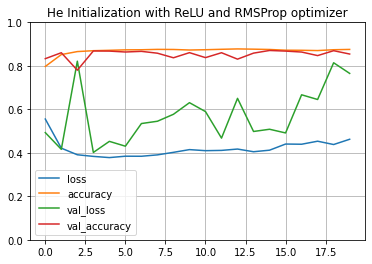

In [26]:
# ReLU goes with he initialization, RMSProp optimizer
tf.random.set_seed(50)
np.random.seed(50)

model_default = keras.models.Sequential()
model_default.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_layers in (300, 100, 50, 50, 50):
  model_default.add(keras.layers.Dense(n_layers, activation ='relu', kernel_initializer="he_normal"))
model_default.add(keras.layers.Dense(10, activation='softmax'))
    
model_default.compile(loss="sparse_categorical_crossentropy",
                      optimizer=keras.optimizers.RMSprop(lr=0.001, rho=0.9),
                      metrics=["accuracy"])

start_time = time.time()
history = model_default.fit(X_train_full, y_train_full, epochs=20, validation_split=0.1)
print("--- %s seconds ---" % (time.time() - start_time))

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('He Initialization with ReLU and RMSProp optimizer')
plt.show()

Epoch 1/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.5272 - accuracy: 0.8093 - val_loss: 0.4306 - val_accuracy: 0.8453
Epoch 2/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3831 - accuracy: 0.8599 - val_loss: 0.3830 - val_accuracy: 0.8587
Epoch 3/20
1688/1688 [==============================] - 9s 6ms/step - loss: 0.3455 - accuracy: 0.8731 - val_loss: 0.3882 - val_accuracy: 0.8605
Epoch 4/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3196 - accuracy: 0.8844 - val_loss: 0.3369 - val_accuracy: 0.8787
Epoch 5/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3065 - accuracy: 0.8870 - val_loss: 0.3385 - val_accuracy: 0.8767
Epoch 6/20
1688/1688 [==============================] - 9s 6ms/step - loss: 0.2885 - accuracy: 0.8927 - val_loss: 0.3236 - val_accuracy: 0.8822
Epoch 7/20
1688/1688 [==============================] - 9s 6ms/step - loss: 0.2791 - accuracy: 0.8959 - val_loss: 0.3243 - val_accur

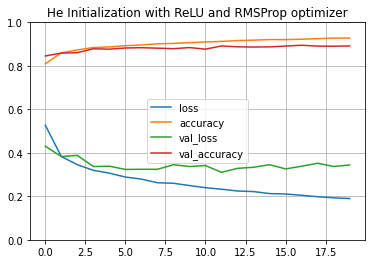

In [27]:
# ReLU goes with he initialization, Adam optimizer
tf.random.set_seed(50)
np.random.seed(50)

model_default = keras.models.Sequential()
model_default.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_layers in (300, 100, 50, 50, 50):
  model_default.add(keras.layers.Dense(n_layers, activation ='relu', kernel_initializer="he_normal"))
model_default.add(keras.layers.Dense(10, activation='softmax'))
    
model_default.compile(loss="sparse_categorical_crossentropy",
                      optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
                      metrics=["accuracy"])

start_time = time.time()
history = model_default.fit(X_train_full, y_train_full, epochs=20, validation_split=0.1)
print("--- %s seconds ---" % (time.time() - start_time))

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('He Initialization with ReLU and Adam optimizer')
plt.show()

Epoch 1/20
1688/1688 [==============================] - 9s 6ms/step - loss: 0.5594 - accuracy: 0.8044 - val_loss: 0.4559 - val_accuracy: 0.8402
Epoch 2/20
1688/1688 [==============================] - 9s 6ms/step - loss: 0.3958 - accuracy: 0.8573 - val_loss: 0.4096 - val_accuracy: 0.8572
Epoch 3/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3533 - accuracy: 0.8721 - val_loss: 0.3606 - val_accuracy: 0.8653
Epoch 4/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3236 - accuracy: 0.8821 - val_loss: 0.3304 - val_accuracy: 0.8782
Epoch 5/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3053 - accuracy: 0.8873 - val_loss: 0.3404 - val_accuracy: 0.8728
Epoch 6/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2863 - accuracy: 0.8947 - val_loss: 0.3260 - val_accuracy: 0.8797
Epoch 7/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2709 - accuracy: 0.8987 - val_loss: 0.3158 - val_accuracy:

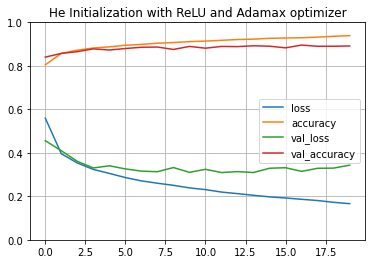

In [28]:
# ReLU goes with he initialization, Adamax optimizer
tf.random.set_seed(50)
np.random.seed(50)

model_default = keras.models.Sequential()
model_default.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_layers in (300, 100, 50, 50, 50):
  model_default.add(keras.layers.Dense(n_layers, activation ='relu', kernel_initializer="he_normal"))
model_default.add(keras.layers.Dense(10, activation='softmax'))
    
model_default.compile(loss="sparse_categorical_crossentropy",
                      optimizer=keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999),
                      metrics=["accuracy"])

start_time = time.time()
history = model_default.fit(X_train_full, y_train_full, epochs=20, validation_split=0.1)
print("--- %s seconds ---" % (time.time() - start_time))

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('He Initialization with ReLU and Adamax optimizer')
plt.show()

Epoch 1/20
1688/1688 [==============================] - 15s 9ms/step - loss: 0.5098 - accuracy: 0.8146 - val_loss: 0.4679 - val_accuracy: 0.8320
Epoch 2/20
1688/1688 [==============================] - 15s 9ms/step - loss: 0.3682 - accuracy: 0.8649 - val_loss: 0.3662 - val_accuracy: 0.8635
Epoch 3/20
1688/1688 [==============================] - 15s 9ms/step - loss: 0.3317 - accuracy: 0.8772 - val_loss: 0.4035 - val_accuracy: 0.8547
Epoch 4/20
1688/1688 [==============================] - 16s 9ms/step - loss: 0.3090 - accuracy: 0.8860 - val_loss: 0.3202 - val_accuracy: 0.8820
Epoch 5/20
1688/1688 [==============================] - 16s 9ms/step - loss: 0.2912 - accuracy: 0.8921 - val_loss: 0.3369 - val_accuracy: 0.8767
Epoch 6/20
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2779 - accuracy: 0.8972 - val_loss: 0.3502 - val_accuracy: 0.8780
Epoch 7/20
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2665 - accuracy: 0.8998 - val_loss: 0.3334 - val_ac

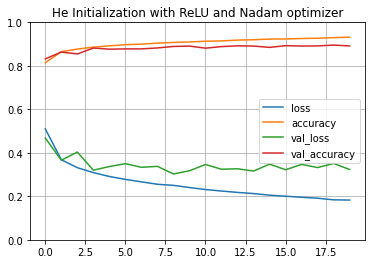

In [29]:
# ReLU goes with he initialization, Nadam optimizer
tf.random.set_seed(50)
np.random.seed(50)

model_default = keras.models.Sequential()
model_default.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_layers in (300, 100, 50, 50, 50):
  model_default.add(keras.layers.Dense(n_layers, activation ='relu', kernel_initializer="he_normal"))
model_default.add(keras.layers.Dense(10, activation='softmax'))
    
model_default.compile(loss="sparse_categorical_crossentropy",
                      optimizer=keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999),
                      metrics=["accuracy"])

start_time = time.time()
history = model_default.fit(X_train_full, y_train_full, epochs=20, validation_split=0.1)
print("--- %s seconds ---" % (time.time() - start_time))

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('He Initialization with ReLU and Nadam optimizer')
plt.show()

## Regression task

In [30]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [31]:
# He Initialization with Randomized ReLU activation function
tf.random.set_seed(42)
np.random.seed(42)

model_default = keras.models.Sequential()
for n_layers in (100, 50, 10, 10, 10):
  model_default.add(keras.layers.Dense(n_layers, activation="relu", 
                                       input_shape=X_train.shape[1:], kernel_initializer='he_normal'))
model_default.add(keras.layers.Dense(1))
    
model_default.compile(loss="mean_squared_error",
                      optimizer=keras.optimizers.SGD(lr=1e-3))

start_time = time.time()
history = model_default.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.0828 - val_loss: 1.1610
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6848 - val_loss: 0.6265
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5257 - val_loss: 0.5508
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4762 - val_loss: 0.5006
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4463 - val_loss: 0.4633
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4243 - val_loss: 0.4480
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4104 - val_loss: 0.4246
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3998 - val_loss: 0.4147
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3899 - val_loss: 0.4028
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3832 - val_loss: 0.3895

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7076 - val_loss: 0.3971
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4014 - val_loss: 2.1733
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4568 - val_loss: 0.4553
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3759 - val_loss: 0.3373
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3587 - val_loss: 0.3411
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3527 - val_loss: 0.3329
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3472 - val_loss: 0.3231
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3443 - val_loss: 0.3242
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3401 - val_loss: 0.3194
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3319 - val_loss: 0.3134

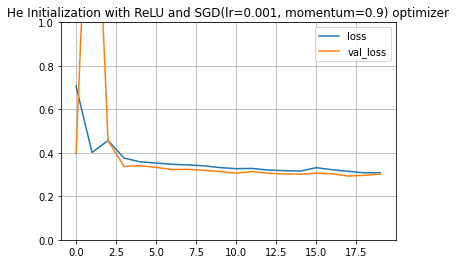

In [33]:
# ReLU goes with he initialization, SGD(lr=0.001, momentum=0.9) optimizer
tf.random.set_seed(42)
np.random.seed(42)

model_default = keras.models.Sequential()
for n_layers in (100, 50, 10, 10, 10):
  model_default.add(keras.layers.Dense(n_layers, activation="relu", 
                                       input_shape=X_train.shape[1:], kernel_initializer='he_normal'))
model_default.add(keras.layers.Dense(1))
    
model_default.compile(loss="mean_squared_error",
                      optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9))

start_time = time.time()
history = model_default.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
print("--- %s seconds ---" % (time.time() - start_time))

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('He Initialization with ReLU and SGD(lr=0.001, momentum=0.9) optimizer')
plt.show()

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6607 - val_loss: 0.5097
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4028 - val_loss: 0.7861
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3936 - val_loss: 0.8609
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3786 - val_loss: 0.6315
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3593 - val_loss: 0.3521
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3658 - val_loss: 1.3906
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4040 - val_loss: 0.3449
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3443 - val_loss: 0.3644
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3369 - val_loss: 0.3186
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3287 - val_loss: 0.3306

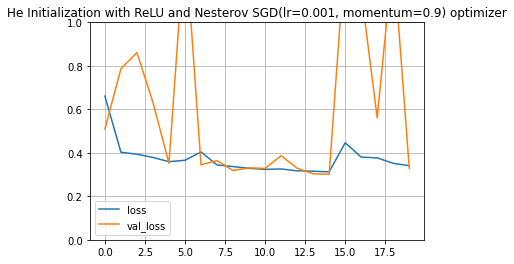

In [34]:
# ReLU goes with he initialization, Nesterov SGD(lr=0.001, momentum=0.9) optimizer
tf.random.set_seed(42)
np.random.seed(42)

model_default = keras.models.Sequential()
for n_layers in (100, 50, 10, 10, 10):
  model_default.add(keras.layers.Dense(n_layers, activation="relu", 
                                       input_shape=X_train.shape[1:], kernel_initializer='he_normal'))
model_default.add(keras.layers.Dense(1))
    
model_default.compile(loss="mean_squared_error",
                      optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True))

start_time = time.time()
history = model_default.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
print("--- %s seconds ---" % (time.time() - start_time))

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('He Initialization with ReLU and Nesterov SGD(lr=0.001, momentum=0.9) optimizer')
plt.show()

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.7734 - val_loss: 8.2066
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1880 - val_loss: 6.1212
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9599 - val_loss: 4.5743
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8489 - val_loss: 3.4396
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7777 - val_loss: 2.8789
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7281 - val_loss: 2.2909
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6920 - val_loss: 1.9037
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6661 - val_loss: 1.5911
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6452 - val_loss: 1.4505
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6276 - val_loss: 1.4164

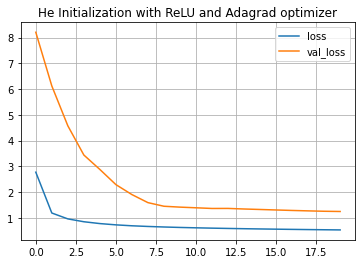

In [36]:
# ReLU goes with he initialization, Adagrad optimizer
tf.random.set_seed(42)
np.random.seed(42)

model_default = keras.models.Sequential()
for n_layers in (100, 50, 10, 10, 10):
  model_default.add(keras.layers.Dense(n_layers, activation="relu", 
                                       input_shape=X_train.shape[1:], kernel_initializer='he_normal'))
model_default.add(keras.layers.Dense(1))
    
model_default.compile(loss="mean_squared_error",
                      optimizer=keras.optimizers.Adagrad(lr=0.001))

start_time = time.time()
history = model_default.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
print("--- %s seconds ---" % (time.time() - start_time))

pd.DataFrame(history.history).plot()
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.title('He Initialization with ReLU and Adagrad optimizer')
plt.show()

Epoch 1/25
363/363 [==============================] - 1s 2ms/step - loss: 0.8108 - val_loss: 0.8561
Epoch 2/25
363/363 [==============================] - 1s 2ms/step - loss: 0.3970 - val_loss: 3.9755
Epoch 3/25
363/363 [==============================] - 1s 2ms/step - loss: 0.3772 - val_loss: 0.4209
Epoch 4/25
363/363 [==============================] - 1s 2ms/step - loss: 0.3484 - val_loss: 0.3871
Epoch 5/25
363/363 [==============================] - 1s 2ms/step - loss: 0.3371 - val_loss: 0.4599
Epoch 6/25
363/363 [==============================] - 1s 2ms/step - loss: 0.3256 - val_loss: 0.5422
Epoch 7/25
363/363 [==============================] - 1s 2ms/step - loss: 0.3181 - val_loss: 0.4135
Epoch 8/25
363/363 [==============================] - 1s 2ms/step - loss: 0.3147 - val_loss: 0.6008
Epoch 9/25
363/363 [==============================] - 1s 2ms/step - loss: 0.3085 - val_loss: 3.6672
Epoch 10/25
363/363 [==============================] - 1s 2ms/step - loss: 0.3164 - val_loss: 0.3819

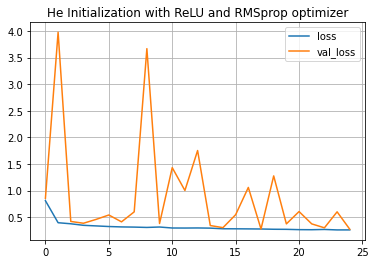

In [44]:
# ReLU goes with he initialization, RMSprop optimizer
tf.random.set_seed(42)
np.random.seed(42)

model_default = keras.models.Sequential()
for n_layers in (100, 50, 10, 10, 10):
  model_default.add(keras.layers.Dense(n_layers, activation="relu", 
                                       input_shape=X_train.shape[1:], kernel_initializer='he_normal'))
model_default.add(keras.layers.Dense(1))
    
model_default.compile(loss="mean_squared_error",
                      optimizer=keras.optimizers.RMSprop(lr=0.001, rho=0.9))

start_time = time.time()
history = model_default.fit(X_train, y_train, epochs=25, validation_data=(X_valid, y_valid))
print("--- %s seconds ---" % (time.time() - start_time))

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.title('He Initialization with ReLU and RMSprop optimizer')
plt.show()

Epoch 1/37
363/363 [==============================] - 1s 2ms/step - loss: 1.0152 - val_loss: 1.0246
Epoch 2/37
363/363 [==============================] - 1s 2ms/step - loss: 0.4158 - val_loss: 0.6849
Epoch 3/37
363/363 [==============================] - 1s 2ms/step - loss: 0.3658 - val_loss: 0.3217
Epoch 4/37
363/363 [==============================] - 1s 2ms/step - loss: 0.3523 - val_loss: 0.3471
Epoch 5/37
363/363 [==============================] - 1s 2ms/step - loss: 0.3441 - val_loss: 0.3216
Epoch 6/37
363/363 [==============================] - 1s 2ms/step - loss: 0.3254 - val_loss: 0.3023
Epoch 7/37
363/363 [==============================] - 1s 2ms/step - loss: 0.3188 - val_loss: 0.2964
Epoch 8/37
363/363 [==============================] - 1s 2ms/step - loss: 0.3115 - val_loss: 1.2188
Epoch 9/37
363/363 [==============================] - 1s 2ms/step - loss: 0.3095 - val_loss: 0.2987
Epoch 10/37
363/363 [==============================] - 1s 2ms/step - loss: 0.3017 - val_loss: 0.2824

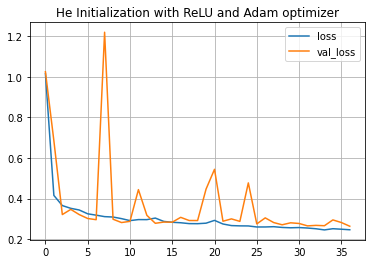

In [42]:
# ReLU goes with he initialization, Adam optimizer
tf.random.set_seed(42)
np.random.seed(42)

model_default = keras.models.Sequential()
for n_layers in (100, 50, 10, 10, 10):
  model_default.add(keras.layers.Dense(n_layers, activation="relu", 
                                       input_shape=X_train.shape[1:], kernel_initializer='he_normal'))
model_default.add(keras.layers.Dense(1))
    
model_default.compile(loss="mean_squared_error",
                      optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999))

start_time = time.time()
history = model_default.fit(X_train, y_train, epochs=37, validation_data=(X_valid, y_valid))
print("--- %s seconds ---" % (time.time() - start_time))

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.title('He Initialization with ReLU and Adam optimizer')
plt.show()

Epoch 1/39
363/363 [==============================] - 1s 2ms/step - loss: 1.6769 - val_loss: 16.3907
Epoch 2/39
363/363 [==============================] - 1s 2ms/step - loss: 0.7098 - val_loss: 9.2826
Epoch 3/39
363/363 [==============================] - 1s 2ms/step - loss: 0.5597 - val_loss: 5.0704
Epoch 4/39
363/363 [==============================] - 1s 2ms/step - loss: 0.4718 - val_loss: 3.0689
Epoch 5/39
363/363 [==============================] - 1s 2ms/step - loss: 0.4204 - val_loss: 2.5622
Epoch 6/39
363/363 [==============================] - 1s 2ms/step - loss: 0.3894 - val_loss: 2.1979
Epoch 7/39
363/363 [==============================] - 1s 2ms/step - loss: 0.3697 - val_loss: 1.8969
Epoch 8/39
363/363 [==============================] - 1s 2ms/step - loss: 0.3554 - val_loss: 1.3850
Epoch 9/39
363/363 [==============================] - 1s 2ms/step - loss: 0.3435 - val_loss: 1.0338
Epoch 10/39
363/363 [==============================] - 1s 2ms/step - loss: 0.3352 - val_loss: 0.806

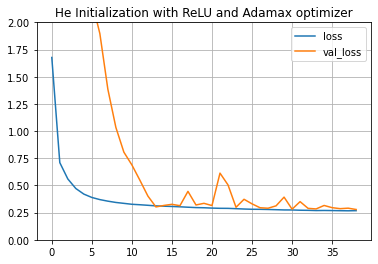

In [47]:
# ReLU goes with he initialization, Adamax optimizer
tf.random.set_seed(42)
np.random.seed(42)

model_default = keras.models.Sequential()
for n_layers in (100, 50, 10, 10, 10):
  model_default.add(keras.layers.Dense(n_layers, activation="relu", 
                                       input_shape=X_train.shape[1:], kernel_initializer='he_normal'))
model_default.add(keras.layers.Dense(1))
    
model_default.compile(loss="mean_squared_error",
                      optimizer=keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999))

start_time = time.time()
history = model_default.fit(X_train, y_train, epochs=39, validation_data=(X_valid, y_valid))
print("--- %s seconds ---" % (time.time() - start_time))

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.title('He Initialization with ReLU and Adamax optimizer')
plt.show()

Epoch 1/36
363/363 [==============================] - 1s 3ms/step - loss: 0.9922 - val_loss: 0.4367
Epoch 2/36
363/363 [==============================] - 1s 3ms/step - loss: 0.4010 - val_loss: 1.8689
Epoch 3/36
363/363 [==============================] - 1s 3ms/step - loss: 0.3673 - val_loss: 0.3243
Epoch 4/36
363/363 [==============================] - 1s 3ms/step - loss: 0.3716 - val_loss: 0.5193
Epoch 5/36
363/363 [==============================] - 1s 3ms/step - loss: 0.3453 - val_loss: 0.5785
Epoch 6/36
363/363 [==============================] - 1s 3ms/step - loss: 0.3297 - val_loss: 0.3159
Epoch 7/36
363/363 [==============================] - 1s 2ms/step - loss: 0.3194 - val_loss: 0.5396
Epoch 8/36
363/363 [==============================] - 1s 2ms/step - loss: 0.3112 - val_loss: 0.4139
Epoch 9/36
363/363 [==============================] - 1s 2ms/step - loss: 0.3044 - val_loss: 0.2946
Epoch 10/36
363/363 [==============================] - 1s 2ms/step - loss: 0.3042 - val_loss: 0.4474

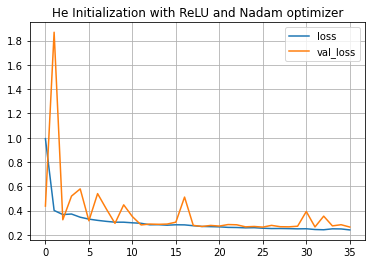

In [49]:
# ReLU goes with he initialization, Nadam optimizer
tf.random.set_seed(42)
np.random.seed(42)

model_default = keras.models.Sequential()
for n_layers in (100, 50, 10, 10, 10):
  model_default.add(keras.layers.Dense(n_layers, activation="relu", 
                                       input_shape=X_train.shape[1:], kernel_initializer='he_normal'))
model_default.add(keras.layers.Dense(1))
    
model_default.compile(loss="mean_squared_error",
                      optimizer=keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999))

start_time = time.time()
history = model_default.fit(X_train, y_train, epochs=36, validation_data=(X_valid, y_valid))
print("--- %s seconds ---" % (time.time() - start_time))

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.title('He Initialization with ReLU and Nadam optimizer')
plt.show()